In [9]:
import mnist_reader

X_train, y_train = mnist_reader.load_mnist('../data/fashion/', kind='train')
X_test, y_test = mnist_reader.load_mnist('../data/fashion', kind='t10k')

In [10]:
from sklearn import svm
s = svm.SVC(kernel = 'poly')
%time s.fit(X_train, y_train)

Wall time: 8min 29s


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
import numpy as np
%time predict = s.predict(X_test)
correct = np.sum(predict == y_test)
total = X_test.shape[0]
accuracy = correct/total*100
print(correct)
print(total)
print(accuracy)

Wall time: 2min 38s
8723
10000
87.22999999999999


In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predict)

array([[834,   5,  21,  20,   4,   2, 104,   0,   9,   1],
       [  4, 981,   1,   8,   3,   0,   3,   0,   0,   0],
       [ 39,   6, 819,  12,  66,   0,  54,   0,   4,   0],
       [ 41,  16,  25, 846,  29,   0,  39,   0,   4,   0],
       [  2,   1, 121,  39, 769,   0,  63,   0,   5,   0],
       [  0,   0,   0,   1,   0, 960,   0,  22,   3,  14],
       [147,   4,  91,  26,  72,   0, 650,   0,  10,   0],
       [  0,   0,   0,   0,   0,  27,   0, 944,   0,  29],
       [  6,   0,  10,   4,   2,   3,  11,   2, 962,   0],
       [  0,   1,   0,   0,   0,  12,   1,  28,   0, 958]], dtype=int64)

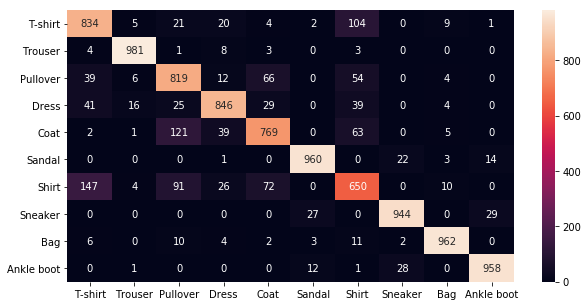

In [13]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
array = confusion_matrix(y_test, predict)

labels = ['T-shirt', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

df_cm = pd.DataFrame(array, index = [i for i in labels],
                  columns = [i for i in labels], dtype='float64')
plt.figure(figsize = (10,5))
sn.heatmap(df_cm, annot=True,fmt='g')
plt.show()